In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
df = pd.read_csv('GoogleStocks.csv')

In [3]:
df=df.drop(df.index[0])

In [4]:
df.head()

,date,close,volume,open,high,low
1,2019/03/26,1184.6200,1894639.0000,1198.5300,1202.8300,1176.7200
2,2019/03/25,1193.0000,1493841.0000,1196.9300,1206.3975,1187.0400
3,2019/03/22,1205.5000,1668910.0000,1226.3200,1230.0000,1202.8250
4,2019/03/21,1231.5400,1195899.0000,1216.0000,1231.7900,1213.1500
5,2019/03/20,1223.9700,2089367.0000,1197.3500,1227.1400,1196.1700


In [5]:
df['close'].head()

1    1184.6200
2    1193.0000
3    1205.5000
4    1231.5400
5    1223.9700
Name: close, dtype: object

In [6]:
df['close']=df['close'].astype('float') 

In [7]:
df['close'].head()

1    1184.62
2    1193.00
3    1205.50
4    1231.54
5    1223.97
Name: close, dtype: float64

In [8]:
df['open']=df['open'].astype('float') 

In [9]:
df['volume']=df['volume'].astype('float') 

In [10]:
df['high']=df['high'].astype('float') 

In [11]:
df['low']=df['low'].astype('float') 

In [12]:
df=df.sort_values(by='date')

In [13]:
label=df['open']

In [14]:
df.head()

,date,close,volume,open,high,low
755,2016/03/28,733.53,1300817.0,736.79,738.99,732.50
754,2016/03/29,744.77,1902254.0,734.59,747.25,728.76
753,2016/03/30,750.53,1782278.0,750.10,757.88,748.74
752,2016/03/31,744.95,1718638.0,749.25,750.85,740.94
751,2016/04/01,749.91,1576240.0,738.60,750.34,737.00


In [15]:
df=df.drop(['date','close','open'],axis=1)

In [16]:
high=df['high'].values
low=df['low'].values
average=(high+low)/2

In [17]:
df['average']=average

In [18]:
df.head()

,volume,high,low,average
755,1300817.0,738.99,732.50,735.745
754,1902254.0,747.25,728.76,738.005
753,1782278.0,757.88,748.74,753.310
752,1718638.0,750.85,740.94,745.895
751,1576240.0,750.34,737.00,743.670


In [19]:
label.head()

755    736.79
754    734.59
753    750.10
752    749.25
751    738.60
Name: open, dtype: float64

In [20]:
label=label.astype('float')
label=np.array(label)
savedlabel=(label)
# label.shape

In [21]:
label=label.reshape(755,1)
label.shape

(755, 1)

In [22]:
features=df[['volume','average']]
features.head()

,volume,average
755,1300817.0,735.745
754,1902254.0,738.005
753,1782278.0,753.310
752,1718638.0,745.895
751,1576240.0,743.670


In [23]:
m=np.mean(features)
std=np.std(features)

In [24]:
features=(features-m)/std

In [25]:
features.head()

,volume,average
755,-0.424974,-1.387095
754,0.453550,-1.372892
753,0.278300,-1.276703
752,0.185341,-1.323304
751,-0.022661,-1.337288


In [26]:
features.head()

,volume,average
755,-0.424974,-1.387095
754,0.453550,-1.372892
753,0.278300,-1.276703
752,0.185341,-1.323304
751,-0.022661,-1.337288


In [27]:
features.shape

(755, 2)

In [28]:
features.iloc[0]

volume    -0.424974
average   -1.387095
Name: 755, dtype: float64

In [29]:
ml=np.mean(label)
stdl=np.std(label)
label=(label-ml)/stdl

In [30]:
label.shape

(755, 1)

In [31]:
features.head()

,volume,average
755,-0.424974,-1.387095
754,0.453550,-1.372892
753,0.278300,-1.276703
752,0.185341,-1.323304
751,-0.022661,-1.337288


In [32]:
type(features)
features=np.array(features)
features.shape

(755, 2)

In [33]:
X_train = []
y_train = []
for i in range(20, len(features)):
    X_train.append(features[i-20:i,0:2])
    y_train.append(label[i,0])

In [34]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [35]:
X_train1 = []
y_train1 = []
for i in range(50, len(features)):
    X_train1.append(features[i-50:i,0:2])
    y_train1.append(label[i,0])
X_train1=np.array(X_train1)
y_train1=np.array(y_train1)

In [36]:
X_train2 = []
y_train2 = []
for i in range(75, len(features)):
    X_train2.append(features[i-75:i,0:2])
    y_train2.append(label[i,0])
X_train2=np.array(X_train2)
y_train2=np.array(y_train2)

In [37]:
type(X_train)

numpy.ndarray

In [38]:
y_train.shape

(735,)

In [39]:
def model(n,hc):
    rnn = Sequential()
    rnn.add(LSTM(units = hc, return_sequences=True, input_shape = (X_train.shape[1], 2))) 
    rnn.add(Dropout(0.2))
    if n==3:
        rnn.add(LSTM(units = hc, return_sequences=True)) 
        rnn.add(Dropout(0.2))
    rnn.add(LSTM(units = hc)) 
    rnn.add(Dropout(0.2))
    rnn.add(Dense(units=1))
    return rnn

In [40]:
def model1(n,hc):
    rnn = Sequential()
    rnn.add(LSTM(units = hc, return_sequences=True, input_shape = (X_train1.shape[1], 2))) 
    rnn.add(Dropout(0.2))
    if n==3:
        rnn.add(LSTM(units = hc, return_sequences=True)) 
        rnn.add(Dropout(0.2))
    rnn.add(LSTM(units = hc)) 
    rnn.add(Dropout(0.2))
    rnn.add(Dense(units=1))
    return rnn

In [41]:
def model2(n,hc):
    rnn = Sequential()
    rnn.add(LSTM(units = hc, return_sequences=True, input_shape = (X_train2.shape[1], 2))) 
    rnn.add(Dropout(0.2))
    if n==3:
        rnn.add(LSTM(units = hc, return_sequences=True)) 
        rnn.add(Dropout(0.2))
    rnn.add(LSTM(units = hc)) 
    rnn.add(Dropout(0.2))
    rnn.add(Dense(units=1))
    return rnn

In [42]:
rnn = model(2,30)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train, y_train, epochs = 20, batch_size = 16, validation_split = 0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 588 samples, validate on 147 samples
Epoch 1/20
588/588 [==============================] - 3s 5ms/step - loss: 0.2373 - val_loss: 0.0460
Epoch 2/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0490 - val_loss: 0.0379
Epoch 3/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0455 - val_loss: 0.0348
Epoch 4/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0426 - val_loss: 0.0339
Epoch 5/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0403 - val_loss: 0.0339
Epoch 6/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0341 - val_loss: 0.0326
Epoch 7/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0343 - val_loss: 0.0331
Epoch 8/20
588/588 

In [43]:
next_stock = rnn.predict(X_train)

In [44]:
psp=pd.DataFrame(next_stock)
psp.head()

,0
0,-1.308837
1,-1.349370
2,-1.380148
3,-1.429506
4,-1.477105


In [45]:
stdl

159.18677604396683

In [46]:
psp=(psp*stdl)+ml

In [47]:
psp.head()

,0
0,748.106323
1,741.654053
2,736.754517
3,728.897400
4,721.320251


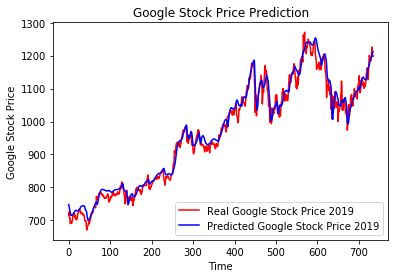

In [48]:
plt.plot(savedlabel[20:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 588 samples, validate on 147 samples
Epoch 1/20
588/588 [==============================] - 3s 6ms/step - loss: 0.2139 - val_loss: 0.0396
Epoch 2/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0375 - val_loss: 0.0330
Epoch 3/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0317 - val_loss: 0.0379
Epoch 4/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0295 - val_loss: 0.0300
Epoch 5/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0289 - val_loss: 0.0314
Epoch 6/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0273 - val_loss: 0.0300
Epoch 7/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0289 - val_loss: 0.0279
Epoch 8/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0276 - val_loss: 0.0303
Epoch 9/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0291 - val_loss: 0.0452
Epoch 10/20
588/588 [==============================] -

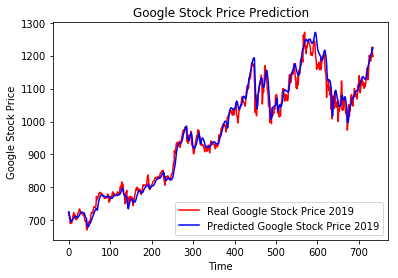

In [49]:
rnn = model(2,50)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train, y_train, epochs = 20, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[20:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 588 samples, validate on 147 samples
Epoch 1/20
588/588 [==============================] - 4s 6ms/step - loss: 0.1603 - val_loss: 0.0377
Epoch 2/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0300 - val_loss: 0.0313
Epoch 3/20
588/588 [==============================] - 1s 2ms/step - loss: 0.0257 - val_loss: 0.0428
Epoch 4/20
588/588 [==============================] - 1s 3ms/step - loss: 0.0300 - val_loss: 0.0301
Epoch 5/20
588/588 [==============================] - 1s 3ms/step - loss: 0.0253 - val_loss: 0.0349
Epoch 6/20
588/588 [==============================] - 2s 3ms/step - loss: 0.0244 - val_loss: 0.0342
Epoch 7/20
588/588 [==============================] - 2s 4ms/step - loss: 0.0236 - val_loss: 0.0397
Epoch 8/20
588/588 [==============================] - 2s 4ms/step - loss: 0.0247 - val_loss: 0.0385
Epoch 9/20
588/588 [==============================] - 2s 3ms/step - loss: 0.0265 - val_loss: 0.0537
Epoch 10/20
588/588 [==============================] -

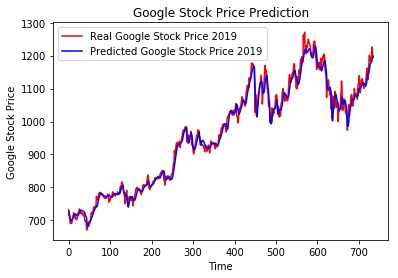

In [50]:
rnn = model(2,80)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train, y_train, epochs = 20, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[20:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 564 samples, validate on 141 samples
Epoch 1/20
564/564 [==============================] - 6s 10ms/step - loss: 0.2259 - val_loss: 0.0649
Epoch 2/20
564/564 [==============================] - 4s 7ms/step - loss: 0.0450 - val_loss: 0.0385
Epoch 3/20
564/564 [==============================] - 6s 10ms/step - loss: 0.0371 - val_loss: 0.0468
Epoch 4/20
564/564 [==============================] - 6s 10ms/step - loss: 0.0392 - val_loss: 0.0541
Epoch 5/20
564/564 [==============================] - 4s 8ms/step - loss: 0.0346 - val_loss: 0.0439
Epoch 6/20
564/564 [==============================] - 5s 8ms/step - loss: 0.0315 - val_loss: 0.0391
Epoch 7/20
564/564 [==============================] - 4s 8ms/step - loss: 0.0308 - val_loss: 0.0324
Epoch 8/20
564/564 [==============================] - 5s 9ms/step - loss: 0.0277 - val_loss: 0.0352
Epoch 9/20
564/564 [==============================] - 5s 9ms/step - loss: 0.0292 - val_loss: 0.0357
Epoch 10/20
564/564 [==============================

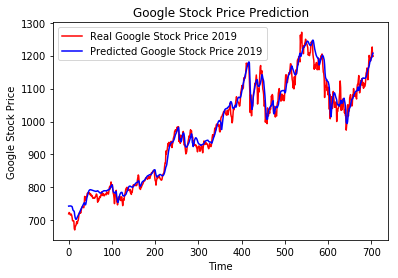

In [51]:
rnn = model1(2,30)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train1, y_train1, epochs = 20, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train1)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[50:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 564 samples, validate on 141 samples
Epoch 1/20
564/564 [==============================] - 6s 10ms/step - loss: 0.2288 - val_loss: 0.0333
Epoch 2/20
564/564 [==============================] - 4s 6ms/step - loss: 0.0394 - val_loss: 0.0429
Epoch 3/20
564/564 [==============================] - 6s 11ms/step - loss: 0.0315 - val_loss: 0.0308
Epoch 4/20
564/564 [==============================] - 3s 5ms/step - loss: 0.0291 - val_loss: 0.0315
Epoch 5/20
564/564 [==============================] - 3s 5ms/step - loss: 0.0279 - val_loss: 0.0360
Epoch 6/20
564/564 [==============================] - 3s 6ms/step - loss: 0.0285 - val_loss: 0.0326
Epoch 7/20
564/564 [==============================] - 6s 10ms/step - loss: 0.0247 - val_loss: 0.0305
Epoch 8/20
564/564 [==============================] - 6s 10ms/step - loss: 0.0237 - val_loss: 0.0330
Epoch 9/20
564/564 [==============================] - 5s 8ms/step - loss: 0.0252 - val_loss: 0.0336
Epoch 10/20
564/564 [=============================

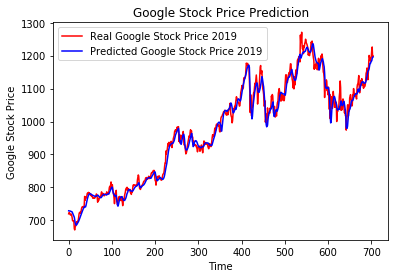

In [52]:
rnn = model1(2,50)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train1, y_train1, epochs = 20, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train1)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[50:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 564 samples, validate on 141 samples
Epoch 1/10
564/564 [==============================] - 6s 11ms/step - loss: 0.1363 - val_loss: 0.0391
Epoch 2/10
564/564 [==============================] - 3s 5ms/step - loss: 0.0268 - val_loss: 0.0443
Epoch 3/10
564/564 [==============================] - 5s 8ms/step - loss: 0.0262 - val_loss: 0.0334
Epoch 4/10
564/564 [==============================] - 5s 9ms/step - loss: 0.0259 - val_loss: 0.0273
Epoch 5/10
564/564 [==============================] - 6s 10ms/step - loss: 0.0280 - val_loss: 0.0273
Epoch 6/10
564/564 [==============================] - 5s 10ms/step - loss: 0.0217 - val_loss: 0.0263
Epoch 7/10
564/564 [==============================] - 6s 11ms/step - loss: 0.0215 - val_loss: 0.0287
Epoch 8/10
564/564 [==============================] - 5s 9ms/step - loss: 0.0198 - val_loss: 0.0266
Epoch 9/10
564/564 [==============================] - 5s 9ms/step - loss: 0.0207 - val_loss: 0.0430
Epoch 10/10
564/564 [=============================

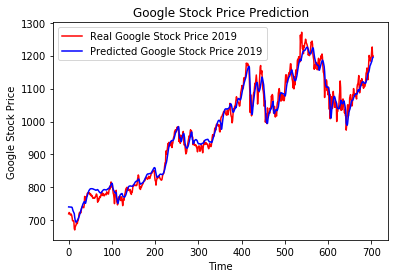

In [53]:
rnn = model1(2,80)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train1, y_train1, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train1)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[50:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 12s 23ms/step - loss: 0.2174 - val_loss: 0.0382
Epoch 2/10
544/544 [==============================] - 11s 21ms/step - loss: 0.0451 - val_loss: 0.0444
Epoch 3/10
544/544 [==============================] - 10s 18ms/step - loss: 0.0387 - val_loss: 0.0419
Epoch 4/10
544/544 [==============================] - 8s 15ms/step - loss: 0.0361 - val_loss: 0.0339
Epoch 5/10
544/544 [==============================] - 7s 12ms/step - loss: 0.0386 - val_loss: 0.0327
Epoch 6/10
544/544 [==============================] - 7s 12ms/step - loss: 0.0323 - val_loss: 0.0426
Epoch 7/10
544/544 [==============================] - 7s 12ms/step - loss: 0.0357 - val_loss: 0.0364
Epoch 8/10
544/544 [==============================] - 6s 12ms/step - loss: 0.0305 - val_loss: 0.0313
Epoch 9/10
544/544 [==============================] - 5s 9ms/step - loss: 0.0311 - val_loss: 0.0305
Epoch 10/10
544/544 [======================

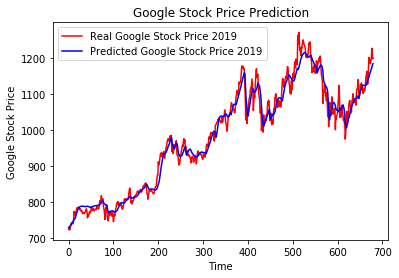

In [54]:
rnn = model2(2,30)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train2, y_train2, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train2)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[75:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 19s 35ms/step - loss: 0.2274 - val_loss: 0.0686
Epoch 2/10
544/544 [==============================] - 9s 17ms/step - loss: 0.0408 - val_loss: 0.0322
Epoch 3/10
544/544 [==============================] - 8s 15ms/step - loss: 0.0301 - val_loss: 0.0406
Epoch 4/10
544/544 [==============================] - 9s 17ms/step - loss: 0.0304 - val_loss: 0.0308
Epoch 5/10
544/544 [==============================] - 8s 14ms/step - loss: 0.0269 - val_loss: 0.0302
Epoch 6/10
544/544 [==============================] - 8s 14ms/step - loss: 0.0274 - val_loss: 0.0302
Epoch 7/10
544/544 [==============================] - 7s 12ms/step - loss: 0.0265 - val_loss: 0.0373
Epoch 8/10
544/544 [==============================] - 8s 14ms/step - loss: 0.0248 - val_loss: 0.0293
Epoch 9/10
544/544 [==============================] - 7s 13ms/step - loss: 0.0223 - val_loss: 0.0302
Epoch 10/10
544/544 [=======================

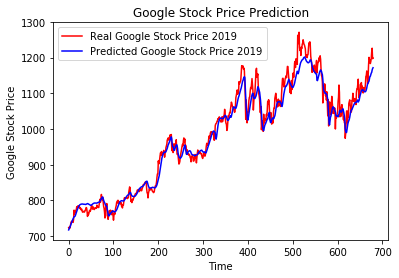

In [55]:
rnn = model2(2,50)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train2, y_train2, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train2)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[75:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 11s 21ms/step - loss: 0.1488 - val_loss: 0.0432
Epoch 2/10
544/544 [==============================] - 8s 14ms/step - loss: 0.0276 - val_loss: 0.0306
Epoch 3/10
544/544 [==============================] - 8s 14ms/step - loss: 0.0278 - val_loss: 0.0318
Epoch 4/10
544/544 [==============================] - 9s 17ms/step - loss: 0.0273 - val_loss: 0.0320
Epoch 5/10
544/544 [==============================] - 8s 15ms/step - loss: 0.0230 - val_loss: 0.0297
Epoch 6/10
544/544 [==============================] - 10s 19ms/step - loss: 0.0218 - val_loss: 0.0300
Epoch 7/10
544/544 [==============================] - 9s 17ms/step - loss: 0.0239 - val_loss: 0.0300
Epoch 8/10
544/544 [==============================] - 11s 19ms/step - loss: 0.0226 - val_loss: 0.0272
Epoch 9/10
544/544 [==============================] - 10s 19ms/step - loss: 0.0217 - val_loss: 0.0253
Epoch 10/10
544/544 [====================

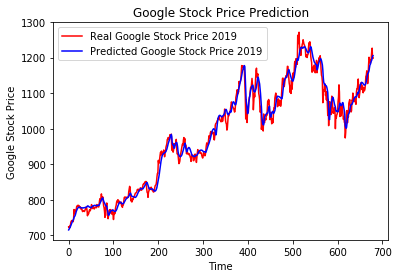

In [56]:
rnn = model2(2,80)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train2, y_train2, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train2)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[75:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 588 samples, validate on 147 samples
Epoch 1/10
588/588 [==============================] - 14s 24ms/step - loss: 0.2438 - val_loss: 0.0492
Epoch 2/10
588/588 [==============================] - 3s 6ms/step - loss: 0.0590 - val_loss: 0.0456
Epoch 3/10
588/588 [==============================] - 3s 5ms/step - loss: 0.0523 - val_loss: 0.0432
Epoch 4/10
588/588 [==============================] - 3s 5ms/step - loss: 0.0471 - val_loss: 0.0395
Epoch 5/10
588/588 [==============================] - 3s 6ms/step - loss: 0.0417 - val_loss: 0.0396
Epoch 6/10
588/588 [==============================] - 3s 5ms/step - loss: 0.0403 - val_loss: 0.0373
Epoch 7/10
588/588 [==============================] - 3s 5ms/step - loss: 0.0405 - val_loss: 0.0661
Epoch 8/10
588/588 [==============================] - 3s 4ms/step - loss: 0.0378 - val_loss: 0.0373
Epoch 9/10
588/588 [==============================] - 2s 4ms/step - loss: 0.0374 - val_loss: 0.0375
Epoch 10/10
588/588 [==============================]

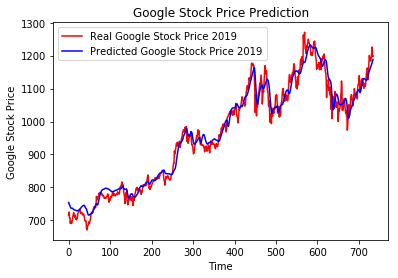

In [57]:
rnn = model(3,30)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train, y_train, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[20:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 588 samples, validate on 147 samples
Epoch 1/10
588/588 [==============================] - 9s 16ms/step - loss: 0.2125 - val_loss: 0.0595
Epoch 2/10
588/588 [==============================] - 3s 5ms/step - loss: 0.0525 - val_loss: 0.0561
Epoch 3/10
588/588 [==============================] - 4s 7ms/step - loss: 0.0439 - val_loss: 0.0383
Epoch 4/10
588/588 [==============================] - 4s 6ms/step - loss: 0.0387 - val_loss: 0.0375
Epoch 5/10
588/588 [==============================] - 4s 7ms/step - loss: 0.0333 - val_loss: 0.0536
Epoch 6/10
588/588 [==============================] - 4s 6ms/step - loss: 0.0386 - val_loss: 0.0351
Epoch 7/10
588/588 [==============================] - 4s 6ms/step - loss: 0.0297 - val_loss: 0.0370
Epoch 8/10
588/588 [==============================] - 4s 6ms/step - loss: 0.0308 - val_loss: 0.0360
Epoch 9/10
588/588 [==============================] - 4s 7ms/step - loss: 0.0291 - val_loss: 0.0390
Epoch 10/10
588/588 [==============================] 

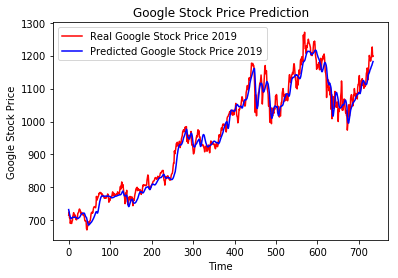

In [58]:
rnn = model(3,50)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train, y_train, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[20:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 588 samples, validate on 147 samples
Epoch 1/10
588/588 [==============================] - 9s 15ms/step - loss: 0.1627 - val_loss: 0.0681
Epoch 2/10
588/588 [==============================] - 2s 4ms/step - loss: 0.0436 - val_loss: 0.0400
Epoch 3/10
588/588 [==============================] - 3s 4ms/step - loss: 0.0395 - val_loss: 0.0412
Epoch 4/10
588/588 [==============================] - 3s 5ms/step - loss: 0.0325 - val_loss: 0.0381
Epoch 5/10
588/588 [==============================] - 4s 7ms/step - loss: 0.0383 - val_loss: 0.0396
Epoch 6/10
588/588 [==============================] - 4s 6ms/step - loss: 0.0318 - val_loss: 0.0357
Epoch 7/10
588/588 [==============================] - 5s 8ms/step - loss: 0.0303 - val_loss: 0.0329
Epoch 8/10
588/588 [==============================] - 4s 8ms/step - loss: 0.0277 - val_loss: 0.0340
Epoch 9/10
588/588 [==============================] - 5s 8ms/step - loss: 0.0270 - val_loss: 0.0393
Epoch 10/10
588/588 [==============================] 

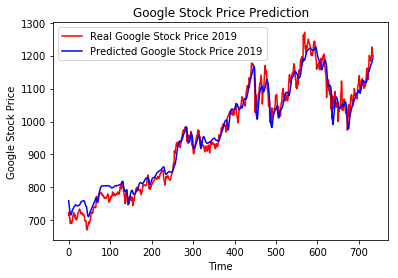

In [59]:
rnn = model(3,80)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train, y_train, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[20:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 564 samples, validate on 141 samples
Epoch 1/20
564/564 [==============================] - 14s 25ms/step - loss: 0.2917 - val_loss: 0.0556
Epoch 2/20
564/564 [==============================] - 4s 7ms/step - loss: 0.0669 - val_loss: 0.0437
Epoch 3/20
564/564 [==============================] - 5s 10ms/step - loss: 0.0533 - val_loss: 0.0507
Epoch 4/20
564/564 [==============================] - 6s 10ms/step - loss: 0.0488 - val_loss: 0.0426
Epoch 5/20
564/564 [==============================] - 6s 11ms/step - loss: 0.0461 - val_loss: 0.0701
Epoch 6/20
564/564 [==============================] - 6s 11ms/step - loss: 0.0407 - val_loss: 0.0391
Epoch 7/20
564/564 [==============================] - 6s 11ms/step - loss: 0.0385 - val_loss: 0.0649
Epoch 8/20
564/564 [==============================] - 6s 11ms/step - loss: 0.0408 - val_loss: 0.0447
Epoch 9/20
564/564 [==============================] - 6s 11ms/step - loss: 0.0383 - val_loss: 0.0388
Epoch 10/20
564/564 [========================

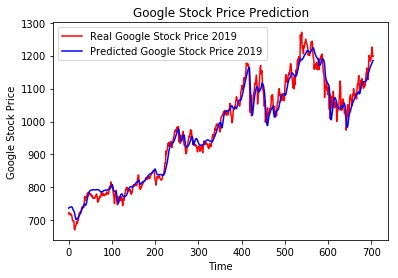

In [60]:
rnn = model1(3,30)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train1, y_train1, epochs = 20, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train1)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[50:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 564 samples, validate on 141 samples
Epoch 1/10
564/564 [==============================] - 13s 23ms/step - loss: 0.2338 - val_loss: 0.0472
Epoch 2/10
564/564 [==============================] - 5s 8ms/step - loss: 0.0463 - val_loss: 0.0404
Epoch 3/10
564/564 [==============================] - 5s 9ms/step - loss: 0.0398 - val_loss: 0.0410
Epoch 4/10
564/564 [==============================] - 6s 10ms/step - loss: 0.0387 - val_loss: 0.1041
Epoch 5/10
564/564 [==============================] - 7s 13ms/step - loss: 0.0413 - val_loss: 0.0394
Epoch 6/10
564/564 [==============================] - 5s 10ms/step - loss: 0.0361 - val_loss: 0.0378
Epoch 7/10
564/564 [==============================] - 5s 9ms/step - loss: 0.0407 - val_loss: 0.0397
Epoch 8/10
564/564 [==============================] - 8s 13ms/step - loss: 0.0330 - val_loss: 0.0396
Epoch 9/10
564/564 [==============================] - 7s 12ms/step - loss: 0.0291 - val_loss: 0.0479
Epoch 10/10
564/564 [==========================

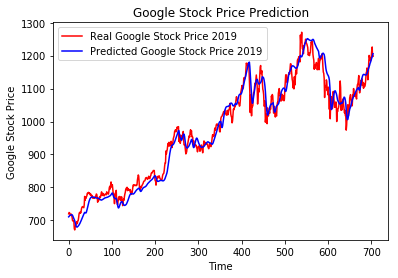

In [61]:
rnn = model1(3,50)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train1, y_train1, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train1)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[50:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 564 samples, validate on 141 samples
Epoch 1/10
564/564 [==============================] - 14s 24ms/step - loss: 0.1275 - val_loss: 0.0449
Epoch 2/10
564/564 [==============================] - 7s 13ms/step - loss: 0.0481 - val_loss: 0.0383
Epoch 3/10
564/564 [==============================] - 8s 13ms/step - loss: 0.0385 - val_loss: 0.0388
Epoch 4/10
564/564 [==============================] - 10s 17ms/step - loss: 0.0328 - val_loss: 0.0424
Epoch 5/10
564/564 [==============================] - 7s 13ms/step - loss: 0.0307 - val_loss: 0.0579
Epoch 6/10
564/564 [==============================] - 7s 13ms/step - loss: 0.0329 - val_loss: 0.0368
Epoch 7/10
564/564 [==============================] - 6s 11ms/step - loss: 0.0282 - val_loss: 0.0484
Epoch 8/10
564/564 [==============================] - 8s 14ms/step - loss: 0.0280 - val_loss: 0.0354
Epoch 9/10
564/564 [==============================] - 7s 13ms/step - loss: 0.0283 - val_loss: 0.0395
Epoch 10/10
564/564 [======================

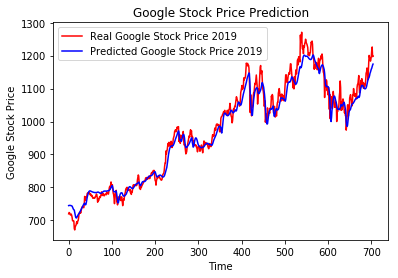

In [62]:
rnn = model1(3,80)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train1, y_train1, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train1)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[50:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 16s 30ms/step - loss: 0.2585 - val_loss: 0.0509
Epoch 2/10
544/544 [==============================] - 12s 21ms/step - loss: 0.0602 - val_loss: 0.0437
Epoch 3/10
544/544 [==============================] - 13s 24ms/step - loss: 0.0548 - val_loss: 0.0537
Epoch 4/10
544/544 [==============================] - 13s 23ms/step - loss: 0.0460 - val_loss: 0.0458
Epoch 5/10
544/544 [==============================] - 10s 18ms/step - loss: 0.0451 - val_loss: 0.0476
Epoch 6/10
544/544 [==============================] - 9s 17ms/step - loss: 0.0414 - val_loss: 0.0452
Epoch 7/10
544/544 [==============================] - 7s 13ms/step - loss: 0.0382 - val_loss: 0.0411
Epoch 8/10
544/544 [==============================] - 7s 13ms/step - loss: 0.0393 - val_loss: 0.0428
Epoch 9/10
544/544 [==============================] - 8s 14ms/step - loss: 0.0412 - val_loss: 0.0604
Epoch 10/10
544/544 [===================

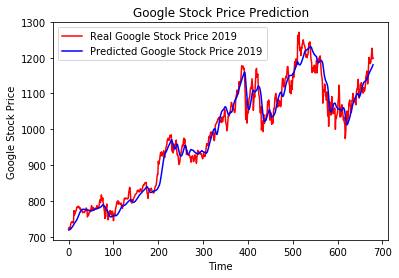

In [63]:
rnn = model2(3,30)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train2, y_train2, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train2)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[75:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 16s 29ms/step - loss: 0.1824 - val_loss: 0.0618
Epoch 2/10
544/544 [==============================] - 9s 16ms/step - loss: 0.0454 - val_loss: 0.0402
Epoch 3/10
544/544 [==============================] - 9s 16ms/step - loss: 0.0409 - val_loss: 0.0391
Epoch 4/10
544/544 [==============================] - 9s 17ms/step - loss: 0.0393 - val_loss: 0.0461
Epoch 5/10
544/544 [==============================] - 9s 16ms/step - loss: 0.0371 - val_loss: 0.0465
Epoch 6/10
544/544 [==============================] - 8s 14ms/step - loss: 0.0375 - val_loss: 0.0384
Epoch 7/10
544/544 [==============================] - 9s 16ms/step - loss: 0.0362 - val_loss: 0.0388
Epoch 8/10
544/544 [==============================] - 9s 16ms/step - loss: 0.0353 - val_loss: 0.0394
Epoch 9/10
544/544 [==============================] - 9s 16ms/step - loss: 0.0308 - val_loss: 0.0357
Epoch 10/10
544/544 [=======================

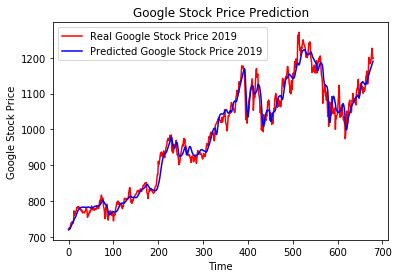

In [64]:
rnn = model2(3,50)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train2, y_train2, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train2)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[75:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Train on 544 samples, validate on 136 samples
Epoch 1/10
544/544 [==============================] - 20s 36ms/step - loss: 0.1506 - val_loss: 0.0447
Epoch 2/10
544/544 [==============================] - 10s 19ms/step - loss: 0.0434 - val_loss: 0.0443
Epoch 3/10
544/544 [==============================] - 11s 21ms/step - loss: 0.0355 - val_loss: 0.0377
Epoch 4/10
544/544 [==============================] - 10s 19ms/step - loss: 0.0325 - val_loss: 0.0375
Epoch 5/10
544/544 [==============================] - 10s 18ms/step - loss: 0.0307 - val_loss: 0.0389
Epoch 6/10
544/544 [==============================] - 11s 20ms/step - loss: 0.0280 - val_loss: 0.0372
Epoch 7/10
544/544 [==============================] - 11s 21ms/step - loss: 0.0273 - val_loss: 0.0348
Epoch 8/10
544/544 [==============================] - 11s 21ms/step - loss: 0.0280 - val_loss: 0.0355
Epoch 9/10
544/544 [==============================] - 11s 21ms/step - loss: 0.0254 - val_loss: 0.0316
Epoch 10/10
544/544 [===============

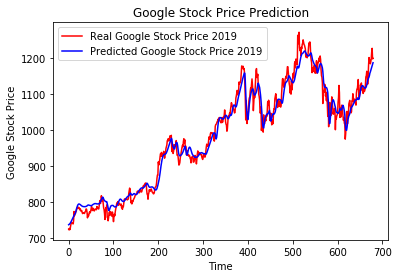

In [65]:
rnn = model2(3,80)  
rnn.compile(optimizer='adam', loss = 'mean_squared_error')   
rnn.fit(X_train2, y_train2, epochs = 10, batch_size = 16, validation_split = 0.2)
next_stock = rnn.predict(X_train2)
psp=pd.DataFrame(next_stock)
# psp.head()
psp=(psp*stdl)+ml
plt.plot(savedlabel[75:],color='red', label='Real Google Stock Price 2019')
plt.plot(psp,color='blue', label='Predicted Google Stock Price 2019')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [68]:
# psp.shape

In [69]:
# savedlabel.shape